# Multi-Layer Perceptron (MLP)

In [1]:
import os
from time import time
from datetime import datetime, timedelta, timezone
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, TensorBoard

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
img_rows, img_cols = 28, 28
input_dim = img_rows * img_cols # = 784

In [4]:
X_train = X_train.reshape(-1, input_dim).astype('float32') / 255
X_test = X_test.reshape(-1, input_dim).astype('float32') / 255

In [5]:
X_train.shape

(60000, 784)

In [6]:
output_dim = 10

In [7]:
Y_train = np_utils.to_categorical(y_train.astype('int32'), output_dim) 
Y_test = np_utils.to_categorical(y_test.astype('int32'), output_dim)

In [8]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
UNITS_1 = 256
UNITS_2 = 512

In [10]:
ACTIVATION_1 = 'relu'
ACTIVATION_2 = 'relu'

In [11]:
DROPOUT_RATE_1 = 0.5
DROPOUT_RATE_2 = 0.5

In [12]:
OPTIMIZER = 'adam'

In [13]:
BATCH_SIZE = 128

In [14]:
EPOCHS = 50

In [15]:
VALIDATION_SPLIT = 0.1

In [16]:
model = Sequential()
model.add(Dense(UNITS_1, activation=ACTIVATION_1, input_dim=input_dim))
model.add(Dropout(DROPOUT_RATE_1))
model.add(Dense(UNITS_2, activation=ACTIVATION_2))
model.add(Dropout(DROPOUT_RATE_2))
model.add(Dense(output_dim, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=OPTIMIZER,
             metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________


In [17]:
VERBOSE = 0

def make_tensorboard(log_dir_base):
    jst = timezone(timedelta(hours=+9), 'JST')
    jst_now = datetime.now(jst)
    log_dir = log_dir_base + '_' + jst_now.strftime('%Y%m%d%H%M%S')
    os.makedirs(log_dir, exist_ok=True)
    tensorboard = TensorBoard(log_dir=log_dir)
    return tensorboard

CALLBACKS = [
    # EarlyStopping(patience=0, verbose=1),
    make_tensorboard(log_dir_base='log/mlp_keras_mnist')
]

In [18]:
start_time = time()

history = model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=VERBOSE,
                    validation_split=VALIDATION_SPLIT,
                    callbacks=CALLBACKS)

print('Executed in {0:.3f}s'.format(time() - start_time))

Executed in 210.021s


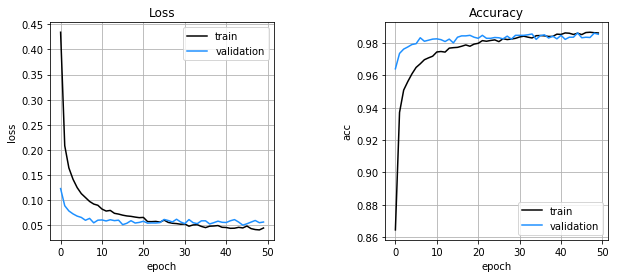

In [19]:
plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train', color='black')
plt.plot(history.history['val_loss'], label='validation', color='dodgerblue')
plt.legend()
# plt.ylim(0, 10)
plt.grid()
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='train', color='black')
plt.plot(history.history['val_acc'], label='validation', color='dodgerblue')
plt.legend(loc='lower right')
# plt.ylim(0, 1)
plt.grid()
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

In [20]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 0s 39us/step
Test loss:  0.07334766941401122
Test accuracy:  0.9814


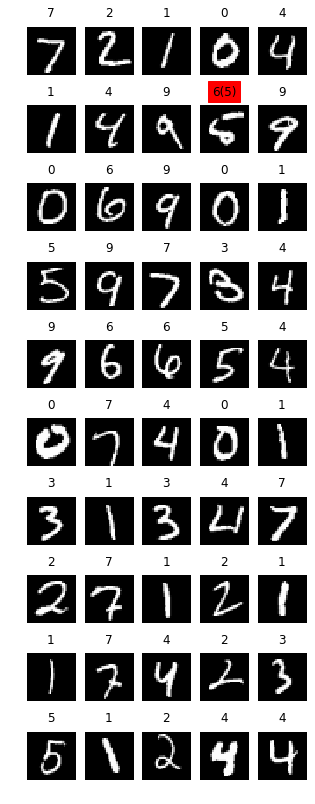

In [21]:
TEST_COUNT = 50

Y_predict = model.predict(X_test)

plt.figure(1, figsize=(5, 14))
plt.subplots_adjust(hspace=0.4)

for i in range(TEST_COUNT):
    plt.subplot(TEST_COUNT / 5, 5, i + 1)
    X = X_test[i, :].reshape(img_rows, img_cols)
    Y = Y_predict[i, :]
    prediction = np.argmax(Y)
    y = np.argmax(Y_test[i, :])
    if prediction == y:
        plt.title(prediction, pad=10)
    else:
        plt.title('{}({})'.format(prediction, y), pad=10,
                  backgroundcolor='red')
    plt.axis('off')
    plt.imshow(X, cmap='gray') 

plt.show()